In [11]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [12]:
X= np.array([50, 60, 70, 80, 90])
y= np.array([150, 180, 210, 240, 270])

df = pd.DataFrame({
    "X": X,
    "y": y
})
print(df)

    X    y
0  50  150
1  60  180
2  70  210
3  80  240
4  90  270


> X (Feature): Represents the input variable, specifically the House Size (likely in m^2).

> y (Target): Represents the output variable we want to predict, specifically the House Price (in thousands).

In [13]:
class LinearRegressionGD():
    """
    Linear Regression using Gradient Descent
    
    Parameters:
    learning_rate : float
        Step size for parameter updates
    n_iters : int
        Number of training iterations

    """
    def __init__(self,learning_rate = 0.001,n_iters= 100):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.theta_0 = 0 # bias
        self.theta_1 = 0 # slope
        self.sse_value = []
    
    def fit(self,X,y):
        """
        Training the Model Using Gradient Descnet
        
        Parameters:
         X : array-like
            Training data
        y : array-like
            Target values
        
        """
        self.theta_0 = 0
        self.theta_1 = 0
        self.sse_value = []
        for i in range(self.n_iters):
            y_pred = self.theta_1 * X + self.theta_0
            # Calculation
            D_theta_0 = (2/len(X)) * np.sum(y_pred - y)
            D_theta_1 = (2/len(X)) * np.sum((y_pred - y) * X)
            self.theta_0 -= self.learning_rate * D_theta_0
            self.theta_1 -= self.learning_rate * D_theta_1

            sse = np.sum((y_pred - y)**2)
            self.sse_value.append(sse)
            if (i + 1) % 100 ==  0:
                print(f"Iteration {i+1}: SSE = {sse:.2f}, theta_0 = {self.theta_0:.4f}, theta_1 = {self.theta_1:.4f}")
    def predict(self,X):
        """
        Make predictions using the trained model
        Parameters:
        X : array-like
            Prediction on X
        Returns:
         predictions : array
            Predicted values
        
        """
        return self.theta_1  * X + self.theta_0
    def get_params(self):
        """
        Get the learned parameters
        """
        return {'theta_0': self.theta_0,
                'theta_1': self.theta_1}
    def calculate_mse(self,X,y):
        prediction = self.predict(X)
        mse =  np.mean((prediction - y)**2)
        return mse
        
    def plot_training(self, X, y):
        """
        Visualize training process and results
        
        Parameters:
        -----------
        X : array
            Training features
        y : array
            Training targets
        """
        plt.figure(figsize=(14, 5))

        # Plot 1: SSE over iterations
        plt.subplot(1, 2, 1)
        plt.plot(range(self.n_iters), self.sse_value)
        plt.xlabel('Iteration')
        plt.ylabel('SSE')
        plt.title('SSE over Iterations')
        plt.grid(True, alpha=0.3)
        
        # Plot 2: Regression line with data points
        plt.subplot(1, 2, 2)
        plt.scatter(X, y, color='red', s=100, label='Actual Data')
        plt.plot(X, self.predict(X), label='Regression Line')
        plt.xlabel('House Size')
        plt.ylabel('Price')
        plt.title('Linear Regression Fit')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

            

In [14]:
print("TASK 2: Create and Train the Model")
print("__" * 100)

# Create model instance
model = LinearRegressionGD(learning_rate=0.001, n_iters=100)

print(f"\n Created LinearRegressionGD instance:")
print(f"  - learning_rate = {model.learning_rate}")
print(f"  - n_iters = {model.n_iters}")

print("\n Training the model")
model.fit(X, y)

# Print learned parameters
params = model.get_params()
print("\n" + "__" * 100)
print("FINAL LEARNED PARAMETERS:")
print("__" * 100)
print(f"   theta_0 (intercept/bias) = {params['theta_0']}")
print(f"   theta_1 (slope/weight)   = {params['theta_1']}")
print("__" * 100)

print(f"   • Regression equation: y = {params['theta_1']:.4f} * X + {params['theta_0']:.4f}")
print(f"   • Interpretation: For every 1 m² increase, price increases by ${params['theta_1']}k")


TASK 2: Create and Train the Model
________________________________________________________________________________________________________________________________________________________________________________________________________

 Created LinearRegressionGD instance:
  - learning_rate = 0.001
  - n_iters = 100

 Training the model
Iteration 100: SSE = 16170789775172398755595238908066781746501483154601364687047344925046310059338778686039147161006092072750161094011290684028412573385239072924446232158666424000849806708860602237814307225288514207744.00, theta_0 = -100559579014623924767868844963106037062468117326748939450646927531409404026744153322495982698496.0000, theta_1 = -7326427288635143620967053747859690313234556035638624697732592825340190692364436098326902412935168.0000

________________________________________________________________________________________________________________________________________________________________________________________________________
FINAL L

## Question: What do theta_0 and theta_1 represent?
   > Answer:
   
   >theta_0 (intercept): The predicted price when house size = 0 m²
   
   >theta_1 (slope): How much the price increases per 1 m² increase in size

In [15]:
# ============================================================================
# TASK 3: Prediction
# ============================================================================
print("\n" + "=" * 70)
print("TASK 3: Prediction")
print("=" * 70)

house_size = 70
predicted_price = model.predict(house_size)

print(f" Predicting price for house size = {house_size} ")
print(f" Predicted price = {predicted_price:4f} thousand dollars")
print(f" Predicted price = ${predicted_price * 1000}")

# Compare with actual
actual_price = y[np.where(X == house_size)[0][0]]
error = abs(predicted_price - actual_price)

print(f"\n   Actual price (from dataset) = {actual_price} thousand dollars")
print(f"   Prediction error = {error:.2f} thousand dollars")




TASK 3: Prediction
 Predicting price for house size = 70 
 Predicted price = -512950469783474681601735659150059764001133837647853304062802627266710541831899364891863753559113728.000000 thousand dollars
 Predicted price = $-5.1295046978347466e+101

   Actual price (from dataset) = 210 thousand dollars
   Prediction error = 512950469783474681601735659150059764001133837647853304062802627266710541831899364891863753559113728.00 thousand dollars


 # Question: Is the prediction reasonable? Why?
> Answer: The prediction is not reasonable!!

    >• The Model failed to train correctly

    >• The learning rate is Too High

    >• The Overshoot: The update step ($0.001 \times -21,000$) added ~21 to the slope. This caused the model to predict approx 1050$ for the first house (which should be 150)

    >The Spiral: Because the error grew larger, the next gradient was even bigger. The model essentially "exploded," spiraling away from the correct answer rather than moving toward it.


TASK 4: Visualization
Training visualizations


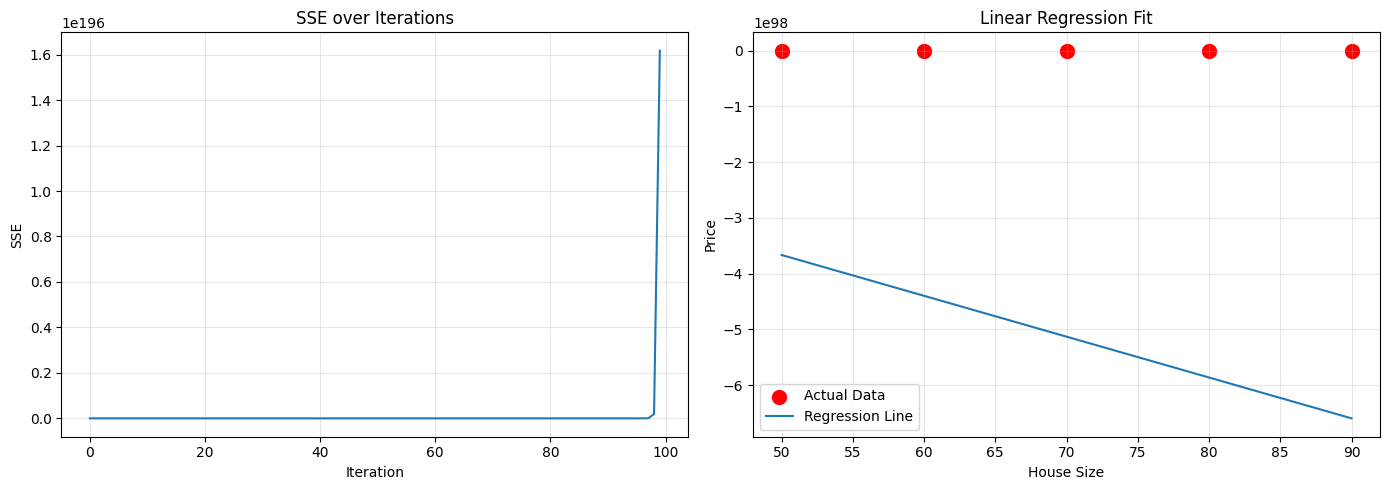

In [16]:
# ============================================================================
# TASK 4: Visualization
# ============================================================================
print("\n" + "=" * 70)
print("TASK 4: Visualization")
print("=" * 70)

print("Training visualizations")
model.plot_training(X, y)



# Soluion 
    > Lower the Learning Rate: Change 0.001 to 0.00001 (add zeros)
    > Normalize the Data: Scale so the values are small (between 0 and 1), which allows you to use the larger 0.001 learning rate safely.

In [17]:
# ============================================================================
# TASK 2: Train the Model
# ============================================================================
print("TASK 2: Create and Train the Model")
print("__" * 100)

# Create model instance
model = LinearRegressionGD(learning_rate=0.00001, n_iters=100)

print(f"\n Created LinearRegressionGD instance:")
print(f"  - learning_rate = {model.learning_rate}")
print(f"  - n_iters = {model.n_iters}")

print("\n Training the model...")
model.fit(X, y)

# Print learned parameters
params = model.get_params()
print("\n" + "__" * 100)
print("FINAL LEARNED PARAMETERS:")
print("__" * 100)
print(f"   theta_0 (intercept/bias) = {params['theta_0']}")
print(f"   theta_1 (slope/weight)   = {params['theta_1']}")
print("__" * 100)

print(f"   • Regression equation: y = {params['theta_1']:.4f} * X + {params['theta_0']:.4f}")
print(f"   • Interpretation: For every 1 m² increase, price increases by ${params['theta_1']}k")
# ============================================================================
# TASK 3: Prediction
# ============================================================================
print("\n" + "=" * 70)
print("TASK 3: Prediction")
print("=" * 70)

house_size = 70
predicted_price = model.predict(house_size)

print(f" Predicting price for house size = {house_size} ")
print(f" Predicted price = {predicted_price:4f} thousand dollars")
print(f" Predicted price = ${predicted_price * 1000}")

# Compare with actual
actual_price = y[np.where(X == house_size)[0][0]]
error = abs(predicted_price - actual_price)

print(f"\n   Actual price (from dataset) = {actual_price} thousand dollars")
print(f"   Prediction error = {error:.2f} thousand dollars")



TASK 2: Create and Train the Model
________________________________________________________________________________________________________________________________________________________________________________________________________

 Created LinearRegressionGD instance:
  - learning_rate = 1e-05
  - n_iters = 100

 Training the model...
Iteration 100: SSE = 0.00, theta_0 = 0.0412, theta_1 = 2.9994

________________________________________________________________________________________________________________________________________________________________________________________________________
FINAL LEARNED PARAMETERS:
________________________________________________________________________________________________________________________________________________________________________________________________________
   theta_0 (intercept/bias) = 0.04116492950170943
   theta_1 (slope/weight)   = 2.9993713328364127
___________________________________________________________________


TASK 4: Visualization
Training visualizations


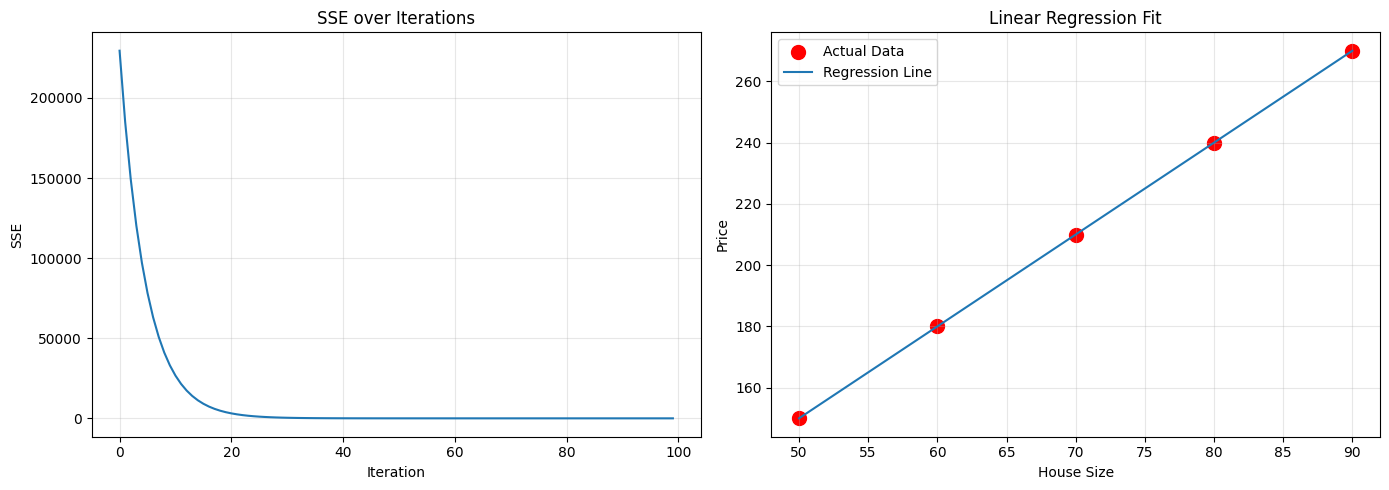

In [18]:
# ============================================================================
# TASK 4: Visualization
# ============================================================================
print("\n" + "=" * 70)
print("TASK 4: Visualization")
print("=" * 70)

print("Training visualizations")
model.plot_training(X, y)



# Why does SSE decrease over time?
  > Answer:
      • Initially: Random parameters → bad predictions → high SSE

      • Each iteration: Gradient descent calculates gradients slopes

      • Parameters are updated in direction that reduces error

      • Predictions get better → SSE decreases

      • Process repeats until SSE is minimized
      
# What does convergence mean in Gradient Descent?
   > Answer:
      • Convergence = when SSE stops changing becomes stable

      • It means we found the best parameters

      • The model can't improve further with current learning rate

      • In our case: SSE reached ~0, indicating perfect fit!


TASK 5: Experimentation with Different Learning Rates

 Testing different learning rates
──────────────────────────────────────────────────────────────────────
Iteration 100: SSE = 30130.81, theta_0 = 0.0264, theta_1 = 1.9237
Iteration 200: SSE = 3875.54, theta_0 = 0.0359, theta_1 = 2.6136
Iteration 300: SSE = 498.49, theta_0 = 0.0393, theta_1 = 2.8611
Iteration 400: SSE = 64.12, theta_0 = 0.0405, theta_1 = 2.9498
Iteration 500: SSE = 8.25, theta_0 = 0.0409, theta_1 = 2.9816
Iteration 600: SSE = 1.06, theta_0 = 0.0411, theta_1 = 2.9931
Iteration 700: SSE = 0.14, theta_0 = 0.0411, theta_1 = 2.9971
Iteration 800: SSE = 0.02, theta_0 = 0.0412, theta_1 = 2.9986
Iteration 900: SSE = 0.00, theta_0 = 0.0412, theta_1 = 2.9991
Iteration 1000: SSE = 0.00, theta_0 = 0.0412, theta_1 = 2.9993

Very Small (lr = 1e-06):
  Final SSE: 0.00
  Converged: Yes
  theta_0: 0.0412, theta_1: 2.9993
Iteration 100: SSE = 0.00, theta_0 = 0.0412, theta_1 = 2.9994
Iteration 200: SSE = 0.00, theta_0 = 0.0412, theta

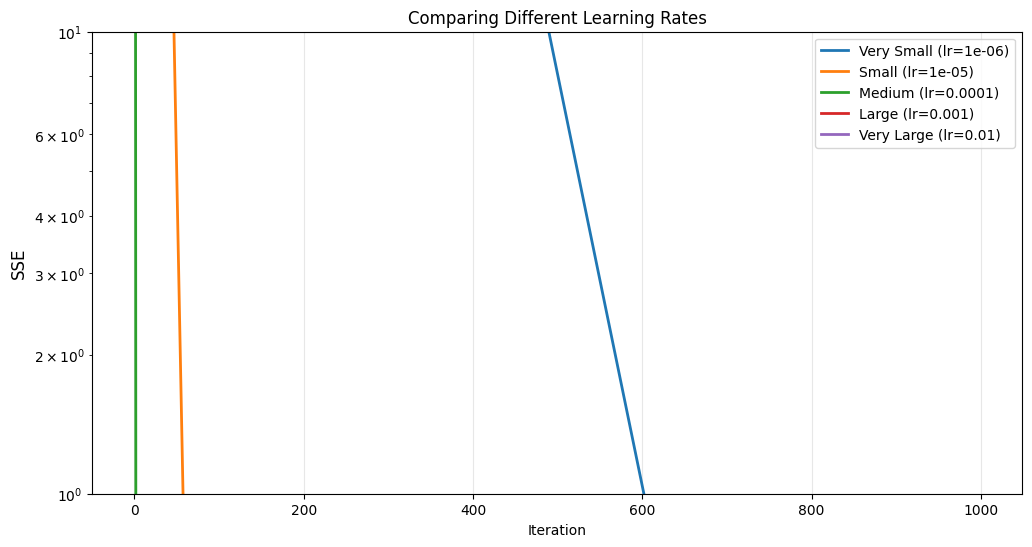

In [19]:
# ============================================================================
# TASK 5: Experimentation with Different Learning Rates
# ============================================================================
print("\n" + "=" * 70)
print("TASK 5: Experimentation with Different Learning Rates")
print("=" * 70)

learning_rates_test = {
    'Very Small': 0.000001,
    'Small': 0.00001,
    'Medium': 0.0001,
    'Large': 0.001,
    'Very Large': 0.01
}

print("\n Testing different learning rates")
print("─" * 70)

results = {}
plt.figure(figsize=(12, 6))

for name, lr in learning_rates_test.items():
    test_model = LinearRegressionGD(learning_rate=lr, n_iters=1000)
    test_model.fit(X, y)
    
    final_sse = test_model.sse_value[-1]
    results[name] = {
        'lr': lr,
        'final_sse': final_sse,
        'theta_0': test_model.theta_0,
        'theta_1': test_model.theta_1,
        'converged': not np.isnan(final_sse) and final_sse < 1
    }
    
    plt.plot(range(1000), test_model.sse_value, label=f'{name} (lr={lr})', linewidth=2)
    
    print(f"\n{name} (lr = {lr}):")
    print(f"  Final SSE: {final_sse:.2f}")
    print(f"  Converged: {'Yes' if results[name]['converged'] else 'Not converged'}")
    if not np.isnan(test_model.theta_0):
        print(f"  theta_0: {test_model.theta_0:.4f}, theta_1: {test_model.theta_1:.4f}")

plt.xlabel('Iteration')
plt.ylabel('SSE', fontsize=12)
plt.title('Comparing Different Learning Rates')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

In [20]:
print("\n" + "__" * 100)
print("BONUS TASKS")
print("__" * 100)

# MSE calculation
mse = model.calculate_mse(X, y)
print(f" Mean Squared Error (MSE): {mse:.6f}")

print("__" * 100)

# Normalization comparison
print(" Normalization Comparison:")
X_normalized = (X - np.mean(X)) / np.std(X)

model_original = LinearRegressionGD(learning_rate=0.00001, n_iters=1000)
model_original.fit(X, y)
print("__" * 100)

model_normalized = LinearRegressionGD(learning_rate=0.1, n_iters=1000)
model_normalized.fit(X_normalized, y)

print(f"   Without normalization (lr=0.00001): Final SSE = {model_original.sse_value[-1]:.4f}")
print(f"   With normalization (lr=0.1):        Final SSE = {model_normalized.sse_value[-1]:.4f}")
print("Key Insight: Normalization allows 10,000x larger learning rate!")
print("  This means faster training without divergence!")



________________________________________________________________________________________________________________________________________________________________________________________________________
BONUS TASKS
________________________________________________________________________________________________________________________________________________________________________________________________________
 Mean Squared Error (MSE): 0.000087
________________________________________________________________________________________________________________________________________________________________________________________________________
 Normalization Comparison:
Iteration 100: SSE = 0.00, theta_0 = 0.0412, theta_1 = 2.9994
Iteration 200: SSE = 0.00, theta_0 = 0.0412, theta_1 = 2.9994
Iteration 300: SSE = 0.00, theta_0 = 0.0412, theta_1 = 2.9994
Iteration 400: SSE = 0.00, theta_0 = 0.0412, theta_1 = 2.9994
Iteration 500: SSE = 0.00, theta_0 = 0.0412, theta_1 = 2.9994
Iteration 6